In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/ghana-crop-disease/Train.csv')

# Print the column names
print(df.columns)

Index(['Image_ID', 'confidence', 'class', 'ymin', 'xmin', 'ymax', 'xmax'], dtype='object')


In [2]:
NO_SAMPLES = -1 # -1 for all samples
BATCH_SIZE = 16

In [3]:
# Shuffle the dataframe and take the first 1000 entries
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataframe

In [4]:
df

,Image_ID,confidence,class,ymin,xmin,ymax,xmax
0,id_oxsug6.jpg,1.0,Corn_Streak,1090.692666,668.256400,1277.409779,717.108223
1,id_oiakvi.jpg,1.0,Corn_Cercospora_Leaf_Spot,584.106810,1725.099563,610.097061,1755.925546
2,id_dv983x.jpg,1.0,Tomato_Septoria,2264.739278,619.407649,2309.024627,653.563433
3,id_dfeeo7.jpg,1.0,Corn_Cercospora_Leaf_Spot,897.998932,3159.077568,1017.738063,3330.146751
4,id_xct61j.jpg,1.0,Corn_Common_Rust,1006.334336,892.410901,1297.129367,1414.171908
...,...,...,...,...,...,...,...
41024,id_7oxlec.jpg,1.0,Tomato_Early_Blight,1719.914203,2177.393125,1823.788452,2320.219947
41025,id_d3ngz2.jpg,1.0,Pepper_Leaf_Mosaic,206.617268,295.634296,222.603093,325.059354
41026,id_4hh3wp.jpg,1.0,Pepper_Leaf_Mosaic,1626.338194,1571.720009,1938.716997,1936.484725
41027,id_23v6m2.jpg,1.0,Pepper_Bacterial_Spot,2423.380012,1872.251509,2561.670106,1939.120004


In [5]:
# Filter the DataFrame where the plant is "tomato"
df = df[df['class'].isin(['Tomato_Healthy', 'Tomato_Late_Blight', 'Tomato_Early_Blight', 'Tomato_Septoria'])]
# Filter the original DataFrame in place
#df = df[df['plant'] == 'tomato']
if NO_SAMPLES > 0:
    df = df.head(NO_SAMPLES)  # Take the first 1000 entries
df

,Image_ID,confidence,class,ymin,xmin,ymax,xmax
2,id_dv983x.jpg,1.0,Tomato_Septoria,2264.739278,619.407649,2309.024627,653.563433
6,id_8bkvtb.jpg,1.0,Tomato_Late_Blight,1476.633517,1400.625845,1603.351578,1515.372464
8,id_ltilj4.jpg,1.0,Tomato_Late_Blight,1266.932052,1437.758452,1374.795090,1537.843727
10,id_n9ef6q.jpg,1.0,Tomato_Septoria,691.715457,843.963700,720.521077,881.768150
11,id_lal9e4.jpg,1.0,Tomato_Septoria,2199.823647,1715.389181,2660.747871,2712.526296
...,...,...,...,...,...,...,...
41012,id_m1m4fm.jpg,1.0,Tomato_Healthy,1140.895785,1785.345433,1250.720141,1919.279859
41013,id_jrjy24.jpg,1.0,Tomato_Early_Blight,1047.452069,1077.471400,1093.057518,1135.952221
41017,id_3xx3bh.jpg,1.0,Tomato_Septoria,1671.219775,2279.007024,1752.648566,2325.330553
41019,id_32e7um.jpg,1.0,Tomato_Healthy,340.350610,1326.204268,581.554878,1462.042683


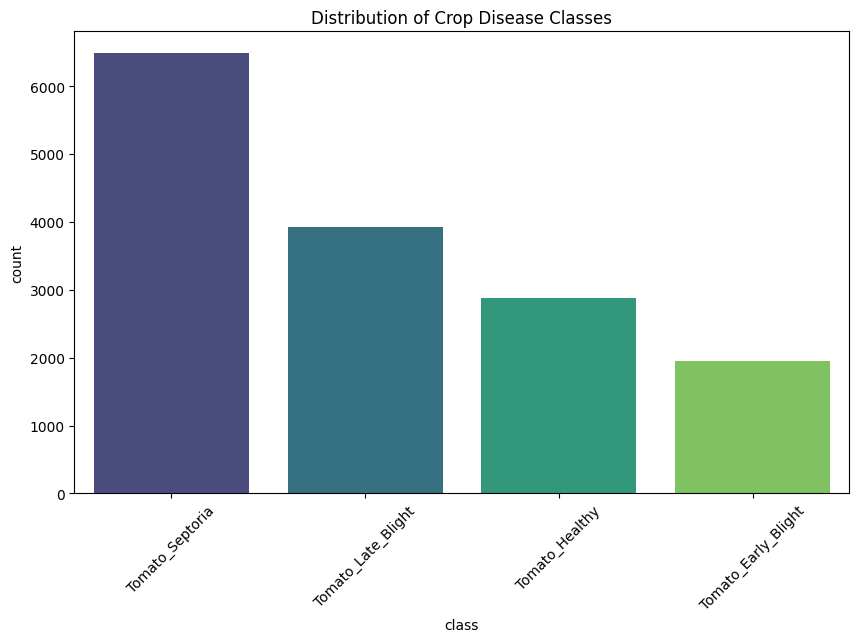

In [6]:
# 1. Distribution of Class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', palette='viridis')
plt.title('Distribution of Crop Disease Classes')
plt.xticks(rotation=45)
plt.savefig("dist_dis.png")
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
class_encoder = LabelEncoder()

# Fit and transform the 'class' column
df['class_idx'] = class_encoder.fit_transform(df['class'])

# Display the mapping of classes to indices
class_mapping = dict(zip(class_encoder.classes_, class_encoder.transform(class_encoder.classes_)))
print("Class Index Mapping:\n", class_mapping)
reversed_mapping = {v: k for k, v in class_mapping.items()}

Class Index Mapping:
 {'Tomato_Early_Blight': 0, 'Tomato_Healthy': 1, 'Tomato_Late_Blight': 2, 'Tomato_Septoria': 3}


/tmp/ipykernel_17/375512231.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class_idx'] = class_encoder.fit_transform(df['class'])


In [8]:
df

,Image_ID,confidence,class,ymin,xmin,ymax,xmax,class_idx
2,id_dv983x.jpg,1.0,Tomato_Septoria,2264.739278,619.407649,2309.024627,653.563433,3
6,id_8bkvtb.jpg,1.0,Tomato_Late_Blight,1476.633517,1400.625845,1603.351578,1515.372464,2
8,id_ltilj4.jpg,1.0,Tomato_Late_Blight,1266.932052,1437.758452,1374.795090,1537.843727,2
10,id_n9ef6q.jpg,1.0,Tomato_Septoria,691.715457,843.963700,720.521077,881.768150,3
11,id_lal9e4.jpg,1.0,Tomato_Septoria,2199.823647,1715.389181,2660.747871,2712.526296,3
...,...,...,...,...,...,...,...,...
41012,id_m1m4fm.jpg,1.0,Tomato_Healthy,1140.895785,1785.345433,1250.720141,1919.279859,1
41013,id_jrjy24.jpg,1.0,Tomato_Early_Blight,1047.452069,1077.471400,1093.057518,1135.952221,0
41017,id_3xx3bh.jpg,1.0,Tomato_Septoria,1671.219775,2279.007024,1752.648566,2325.330553,3
41019,id_32e7um.jpg,1.0,Tomato_Healthy,340.350610,1326.204268,581.554878,1462.042683,1


In [9]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
import torch

# Define a custom dataset class
class CropDiseaseDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = os.path.join(self.root_dir, f"{row['Image_ID']}")
        image = Image.open(img_path).convert("RGB")

        # Apply bounding box crop
        xmin, ymin, xmax, ymax = row["xmin"], row["ymin"], row["xmax"], row["ymax"]
        image = image.crop((xmin, ymin, xmax, ymax))

        # Apply transformations if any
        if self.transform:
            image = self.transform(image)

        label = row["class_idx"]
        return image, img_path

# Define the root directory for images
root_dir = "/kaggle/input/ghana-crop-disease/images/"

# Split the dataset into training and testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["class_idx"])

# Define transformations (resize, normalization, etc.)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets and loaders
train_dataset = CropDiseaseDataset(train_df, root_dir, transform=transform)
test_dataset = CropDiseaseDataset(test_df, root_dir, transform=transform)

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [11]:
import torch
import torch.nn as nn
from torchvision import models

# Load the pre-trained ResNet model
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 4) #.fc for resnet
# Load the saved weights
checkpoint = torch.load("/kaggle/input/resnet50_unfrozen_train_tomato/pytorch/default/1/model.pth")
#model.load_state_dict(checkpoint['model_state_dict'])
model.load_state_dict(checkpoint)
# If the model was saved with optimizer state and epoch information:
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']

# Make sure to set the model to evaluation mode if you're just using it for inference
model.eval()


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 175MB/s]
/tmp/ipykernel_17/4011660297.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possi

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
from torch.utils.data import Subset

# Assuming `original_dataset` is your PyTorch dataset
# Create a subset with only the first 5 entries
subset_indices = list(range(5))  # Indices for the first 5 entries
subset_dataset = Subset(test_dataset, subset_indices)

# Now `subset_dataset` contains only the first 5 entries of `original_dataset`


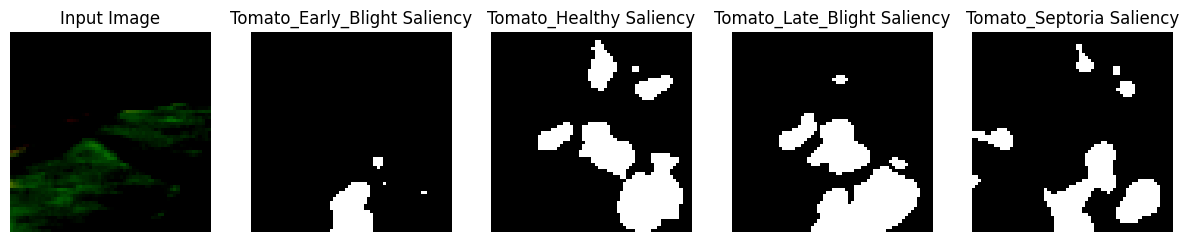

Saliency maps processed for image id_d5rxui


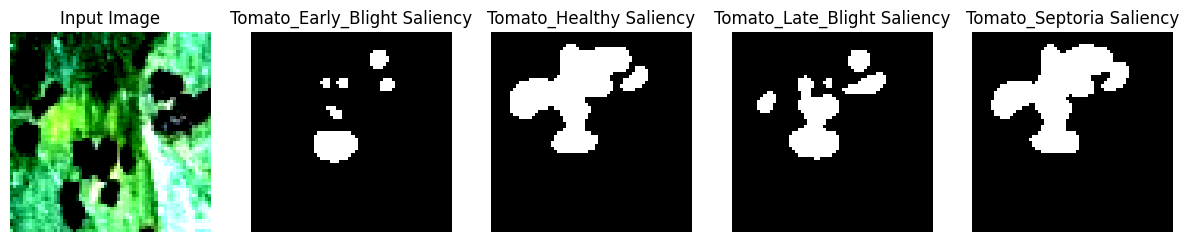

Saliency maps processed for image id_ri8ktw


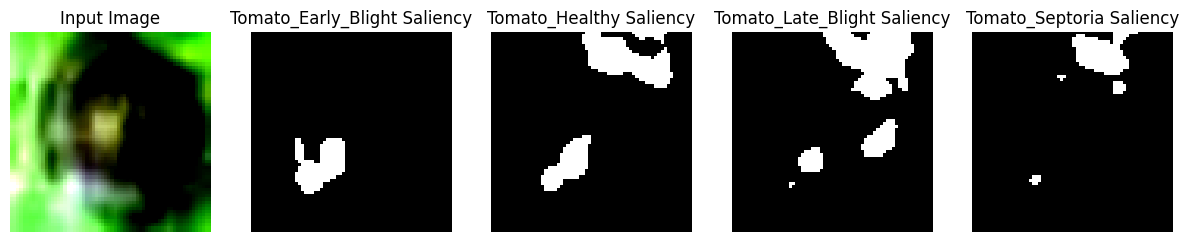

Saliency maps processed for image id_ips3u7


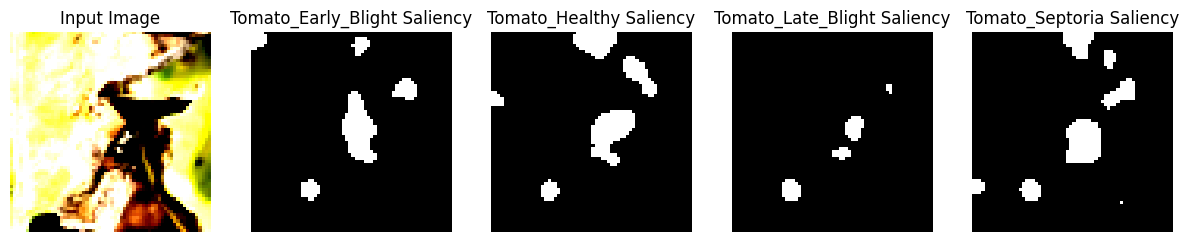

Saliency maps processed for image id_6xt55f


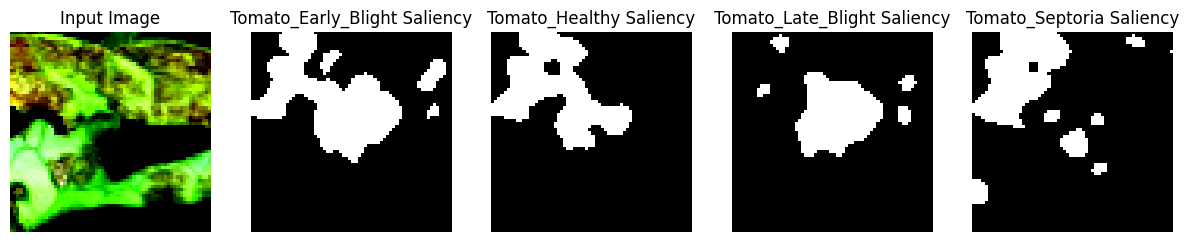

Saliency maps processed for image id_f7bmak


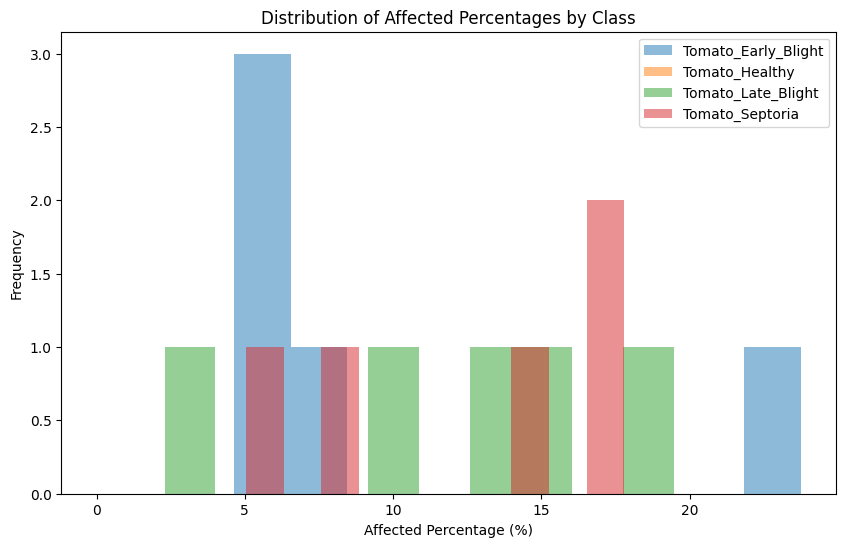

In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import os

def generate_all_saliency_maps(model, input_image, threshold=0.2, blur_sigma=2):
    model.eval()
    input_image.requires_grad_()

    # Forward pass to get predictions
    output = model(input_image)

    # List to hold saliency maps for all output neurons
    saliency_maps = []

    # Generate saliency maps for each output neuron
    for i in range(output.shape[1]):
        # Zero gradients before backpropagation
        model.zero_grad()
        class_score = output[0][i]
        class_score.backward(retain_graph=True)

        # Compute the saliency map for the class
        saliency = input_image.grad.data.abs().squeeze().detach().cpu().numpy()
        saliency = np.max(saliency, axis=0)  # Take maximum along the color channel
        saliency = (saliency - saliency.min()) / (saliency.max() - saliency.min())  # Normalize to [0, 1]

        # Apply threshold to remove noise
        saliency[saliency < threshold] = 0

        # Apply Gaussian blur to smooth edges
        smoothed_saliency = gaussian_filter(saliency, sigma=blur_sigma)

        # Binarize the saliency map after smoothing
        binary_mask = (smoothed_saliency > 0.1).astype(np.float32)  # Adjust 0.1 for final mask threshold

        saliency_maps.append(binary_mask)
        input_image.grad.zero_()  # Clear gradients for the next iteration

    # Return all binary saliency masks
    return saliency_maps

def display_all_saliency_maps(input_image, saliency_maps):
    # Convert input tensor to numpy for display
    input_image_np = input_image.squeeze().detach().cpu().numpy()
    input_image_np = np.transpose(input_image_np, (1, 2, 0))

    # Find the maximum saliency map across all classes
    max_saliency_map = np.max(np.array(saliency_maps), axis=0)

    # Plotting all saliency maps in a single row
    fig, axs = plt.subplots(1, len(saliency_maps) + 1, figsize=(3 * (len(saliency_maps) + 1), 3))

    # Display input image
    axs[0].imshow(input_image_np)
    axs[0].set_title("Input Image")
    axs[0].axis('off')

    # Display each saliency map in BW
    for i, saliency_map in enumerate(saliency_maps):
        axs[i + 1].imshow(saliency_map, cmap='gray', vmin=0, vmax=1)  # Use grayscale colormap
        axs[i + 1].set_title(f"{reversed_mapping[i]} Saliency")  # Use class index or label
        axs[i + 1].axis('off')

    plt.show()

    return max_saliency_map

def calculate_affected_percentage(saliency_map):
    # Calculate the percentage of affected area
    affected_area = np.sum(saliency_map)  # Sum of affected area (1's)
    total_area = saliency_map.size  # Total area
    return (affected_area / total_area) * 100  # Return percentage

def process_dataset_and_save_saliency(model, dataset, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Initialize a dictionary to store affected percentages for each class
    affected_percentages = {i: [] for i in range(len(reversed_mapping))}

    # Iterate over the dataset
    for idx in range(len(dataset)):
        image, file_path = dataset[idx]
        image_filename = os.path.basename(file_path).split('.')[0]  # Get the image name without extension

        # Unsqueeze to add batch dimension (1, 3, H, W)
        image = image.unsqueeze(0)

        # Generate all saliency maps for each output class
        saliency_maps = generate_all_saliency_maps(model, image)

        # Get the predicted class index
        predicted_class_index = torch.argmax(model(image)).item()  # Get the predicted index

        # Save the affected percentage only for non-healthy classes
        for i, saliency_map in enumerate(saliency_maps):
            if i != 1:  # Skip class index 1 (healthy)
                affected_percentage = calculate_affected_percentage(saliency_map)
                affected_percentages[i].append(affected_percentage)

        # Display all saliency maps in a single row for visualization
        display_all_saliency_maps(image, saliency_maps)

        print(f"Saliency maps processed for image {image_filename}")

    # Plot distribution of affected percentages
    plt.figure(figsize=(10, 6))
    for class_index, percentages in affected_percentages.items():
        plt.hist(percentages, bins=10, alpha=0.5, label=reversed_mapping[class_index])

    plt.title("Distribution of Affected Percentages by Class")
    plt.xlabel("Affected Percentage (%)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

output_dir = '/kaggle/working/masks/'  # Directory to save saliency maps
process_dataset_and_save_saliency(model, subset_dataset, output_dir)
